# Intelligent Systems
# Exercise 06 / Similarities
### Working Group: Intelligent Systems
### Lecture: Prof. Dr.-Ing. habil.  Sven Tomforde
### Exercise: Ma. Sc. Simon Reichhuber (mail to: [Simon.Reichhuber@informatik.uni-kiel.de](mailto:Simon.Reichhuber@informatik.uni-kiel.de))

In [5]:
import scipy.spatial.distance as dist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

-----

In [6]:
# Nothing to do here
def path_cost(A, B, accumulated_cost, distances):
    """Method for backtrackign algorithm and calculation of overall distance."""
    
    path = [[len(A)-1, len(B)-1]]
    cost = 0
    i = len(B)-1
    j = len(A)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [B, A] in path:
        cost = cost + distances[A, B]
    return path, cost 

In [7]:
# Nothing ot do here
def distance_cost_heatmap(distances):
    """Helper method to plot distance matrix as heatmap."""
        
    im = plt.imshow(distances, interpolation='nearest', cmap="Reds") 
    plt.gca().invert_yaxis()
    plt.xlabel("A")
    plt.ylabel("B")
    plt.grid()
    plt.colorbar()
    plt.show()

In [8]:
# Nothing to do here
def plot_dtw_distances(A, B, accumulated_cost, distances):
    """Helper method for plotting DTW distnaces."""
    
    plt.plot(A, 'bo-' ,label='A')
    plt.plot(B, 'g^-', label = 'B')
    plt.legend()
    paths = path_cost(A, B, accumulated_cost, distances)[0]
    for [map_a, map_b] in paths:  
        plt.plot([map_a, map_b], [A[map_a], B[map_b]], 'r')
    plt.show()

----

In [9]:
# Two Time Series
B = [1,1,3,0,5,1]
A = [0,3,0,5,1,1]

#A=[0,2,-3,4,0,1,1]
#B=[0,0,2,-3,5,0,1]

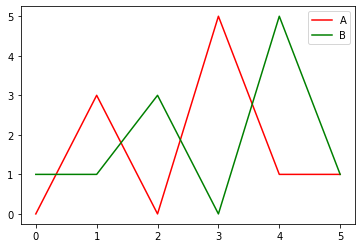

In [10]:
plt.plot(A,'r', label='A')
plt.plot(B, 'g', label='B')
plt.legend()
plt.show()

# 1. Calculate the similarity of the two time series

In [11]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [12]:
# Perform distance measurements 
print ('\nDistance measurements')
print ('-------------------------------------------------')
print ('\nEuclidean distance is', dist.euclidean(A, B))
print ('Manhattan distance is', dist.cityblock(A, B))
print ('Cosine distance is', cosine_similarity(A, B))


Distance measurements
-------------------------------------------------

Euclidean distance is 7.416198487095663
Manhattan distance is 15
Cosine distance is 0.24659848095803594


### Implementiere als nächstes den DTW Algorithmus und Vergleiche die Ergebnisse aus Schritt eins. Warum ist die Verwendung von DTW hier sinnvoll?


# 2. Use Dynamic Time Warping

Dynamic Time Warning (DTW) seeks an optimal alignment between the two time series without assuming that the underlying processes happened at the same <b>speed</b> or for the same amount of time. In other words, the DTW algorithm stretches or compresses two non-linear sequences in making its comparison. This makes it possible to find similarities between sequences that have differences in length, are not in phase, and/or are warped representations of each other:

![title](dtw.png)

## 2.1. DTW - Create distance matrix

In [13]:
distances = np.zeros((len(A), len(B)))

for i in range(len(B)):
    for j in range(len(A)):
        distances[i,j] = np.abs(A[j]-B[i])

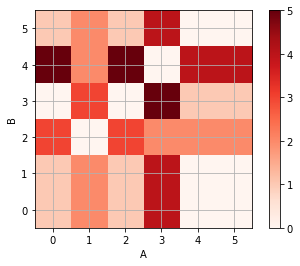

In [14]:
distance_cost_heatmap(distances)

In [15]:
print(pd.DataFrame(distances).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &    0 &    1 &    2 &    3 &    4 &    5 \\
\midrule
0 &  1.0 &  2.0 &  1.0 &  4.0 &  0.0 &  0.0 \\
1 &  1.0 &  2.0 &  1.0 &  4.0 &  0.0 &  0.0 \\
2 &  3.0 &  0.0 &  3.0 &  2.0 &  2.0 &  2.0 \\
3 &  0.0 &  3.0 &  0.0 &  5.0 &  1.0 &  1.0 \\
4 &  5.0 &  2.0 &  5.0 &  0.0 &  4.0 &  4.0 \\
5 &  1.0 &  2.0 &  1.0 &  4.0 &  0.0 &  0.0 \\
\bottomrule
\end{tabular}



## 2.2 DTW - Create accumulated cost matrix

In [16]:
accumulated_cost = np.zeros((len(B), len(A)))

In [17]:
accumulated_cost[0,0] = distances[0,0]

In [18]:
for i in range(1, len(A)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]   

for i in range(1, len(B)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]    
    
for i in range(1, len(B)):
    for j in range(1, len(A)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]

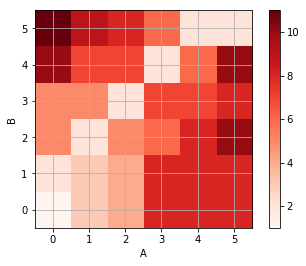

In [16]:
distance_cost_heatmap(accumulated_cost)

In [19]:

print(pd.DataFrame(accumulated_cost).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &     0 &    1 &    2 &    3 &    4 &     5 \\
\midrule
0 &   1.0 &  3.0 &  4.0 &  8.0 &  8.0 &   8.0 \\
1 &   2.0 &  3.0 &  4.0 &  8.0 &  8.0 &   8.0 \\
2 &   5.0 &  2.0 &  5.0 &  6.0 &  8.0 &  10.0 \\
3 &   5.0 &  5.0 &  2.0 &  7.0 &  7.0 &   8.0 \\
4 &  10.0 &  7.0 &  7.0 &  2.0 &  6.0 &  10.0 \\
5 &  11.0 &  9.0 &  8.0 &  6.0 &  2.0 &   2.0 \\
\bottomrule
\end{tabular}



## 2.3 DTW - Find Backtracking path 

In [20]:
path = path_cost(A, B , accumulated_cost, distances)[0]

path_a = [point[0] for point in path]
path_b = [point[1] for point in path]

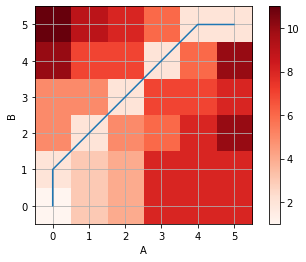

In [21]:
plt.plot(path_a, path_b)
distance_cost_heatmap(accumulated_cost)

In [21]:
path_cost(A, B , accumulated_cost, distances)[1]

2.0

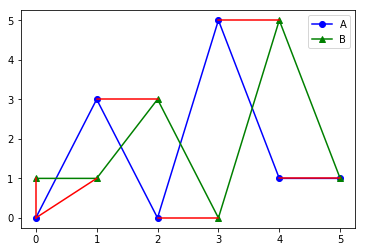

In [22]:
plot_dtw_distances(A, B , accumulated_cost, distances)

In [23]:
print(path_cost(A, B , accumulated_cost, distances)[0])

[[5, 5], [4, 5], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]


In [25]:
accumulated_cost.shape

(6, 6)